DataPreprocessing extract data from a specific date out of a dataset

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

datadir = '../data/nyc_parking_tickets/'
file = 'Parking_Violations_Issued_-_Fiscal_Year_2017.csv'
path = datadir + file

Load the needed columns from the dataset

In [3]:
#Load cols of dataset

dtype = {'Issuer Squad': object, 'Violation Precinct': object}
cols = ['Issuer Squad', 'Violation Precinct']

def squaddataprocessing( data ):
    squaddata = data.groupby(['Issuer Squad','Violation Precinct']).size().reset_index().rename(columns={0:'count'})
    squaddata['Precinct Squad'] = squaddata['Issuer Squad'].map(str) + squaddata['Violation Precinct'].map(str)
    return squaddata

data = pd.read_csv(path, usecols=cols, dtype=dtype)
print(str(len(data)) + ' rows loaded!')

data = squaddataprocessing(data)
print(str(len(data)) + ' rows processed!')


7642647 rows loaded!
2061 rows processed!


In [28]:
data.head()

,Issuer Squad,Violation Precinct,count,Precinct Squad
0,0000,0,9900,00000
1,0000,1,26554,00001
2,0000,10,11718,000010
3,0000,100,8065,0000100
4,0000,101,6920,0000101


In [ ]:
#print(data['Issuer Squad'].describe())
#print(data['Violation Post Code'].describe())

#data2 = data['Violation Post Code'].dropna()

#print(len(data2))
#print(data['Vehicle Make'])

#print(data[['Issuer Squad', 'Violation Precinct']])
#print(data['Issuer Squad'].unique())
#print(data['Violation Precinct'].unique())

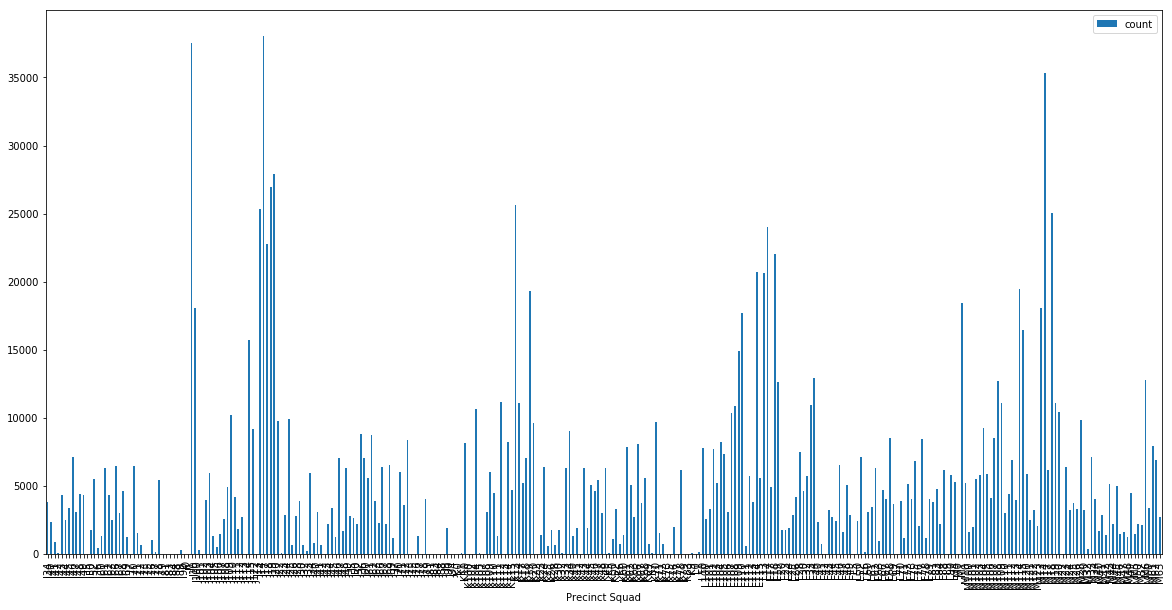

In [118]:
%matplotlib inline
from matplotlib import pyplot as plt

plotdata = data[['Precinct Squad', 'count']]
plotdata = plotdata[1200:1510]

plotdata.plot.bar('Precinct Squad', 'count', figsize=(20, 10),align='center')


In [4]:
print('Top scoring Squads:')

bestsquads = data.nlargest(50,'count')
bestsquads.plot.bar('Precinct Squad', 'count', figsize=(20, 5),align='center')

print(bestsquads[['Precinct Squad','count']])

Top scoring Squads:
     Precinct Squad  count
562              D1  42445
465              C1  39326
212             A18  37275
1081             J1  30986
947              H1  27119
1308            M14  26744
1651            R19  23962
665              E1  23886
59           000019  23812
1099            J14  21285
969             H19  21056
140          000070  20993
547            CC19  20782
788             F19  20745
143          000072  20673
1716            S19  20656
927            GG19  20615
55           000018  20232
1362             N1  20201
210             A14  20199
209             A13  20065
585             D19  19463
1             00001  19154
1456            O19  19147
188             A10  19082
691             E19  18885
1098            J13  18327
132          000066  18132
1529            P19  18126
350             B14  17840
1594            Q19  17732
1372           N108  17636
141          000071  17438
1866           V108  16901
87           000034  16579
248     

Helper Methods

In [127]:
data.to_csv(path_or_buf=datadir + 'squaddata_' + '_' + str(len(data)) + '_' + file)
print('Finished!')

Finished!
